In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Count of the Job Titles

In [5]:
df.pivot_table(index="job_title_short", aggfunc="size")

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [6]:
df.pivot_table(values="salary_year_avg", index="job_title_short", aggfunc="median")

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [8]:
df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median")

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [16]:
df_job_country_salary = df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median")

In [18]:
top_countries = df["job_country"].value_counts().sort_values(ascending=False).head(5).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany'], dtype='object', name='job_country')

In [21]:
df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0


In [24]:
job_titles = ["Data Engineer", "Data Analyst", "Data Scientist"]
df_job_country_salary = df_job_country_salary.loc[:,job_titles]
df_job_country_salary

job_title_short,Data Engineer,Data Analyst,Data Scientist
job_country,,,
United States,125000.0,90000.0,130000.0
India,147500.0,100500.0,114008.0
United Kingdom,110000.0,87750.0,105300.0
France,98301.5,69175.0,88128.0
Germany,147500.0,103750.0,131560.0


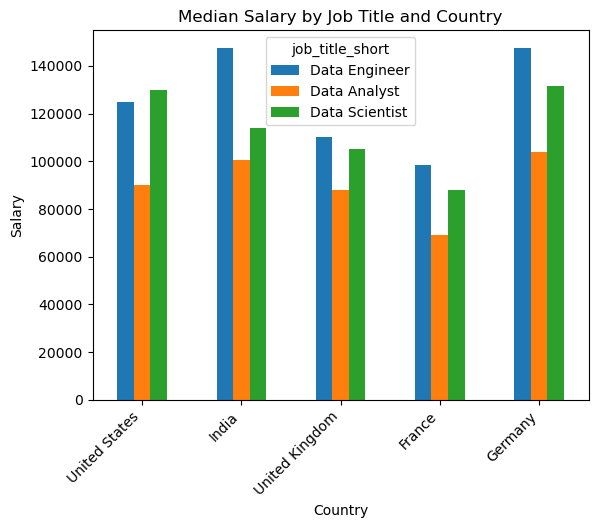

In [29]:
df_job_country_salary.plot(kind="bar")
plt.title("Median Salary by Job Title and Country")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.xticks(rotation=45, ha="right")
plt.show()

# My Analysis

In [107]:
# data
df_sal_via_title = df.pivot_table(
    values="salary_year_avg", 
    index="job_via",
    columns="job_title_short",
    aggfunc="median"
)

In [108]:
job_aquired_via = df.job_via.value_counts().loc[df_sal_via_title.index].sort_values(ascending=False).head(5).index
job_aquired_via

Index(['via LinkedIn', 'via BeBee', 'via Indeed', 'via Recruit.net',
       'via ZipRecruiter'],
      dtype='object', name='job_via')

In [109]:
job_titles_top = df.job_title_short.value_counts().sort_values(ascending=False).head(3).index
job_titles_top

Index(['Data Analyst', 'Data Engineer', 'Data Scientist'], dtype='object', name='job_title_short')

In [111]:
df_sal_via_title = df_sal_via_title[job_titles_top]

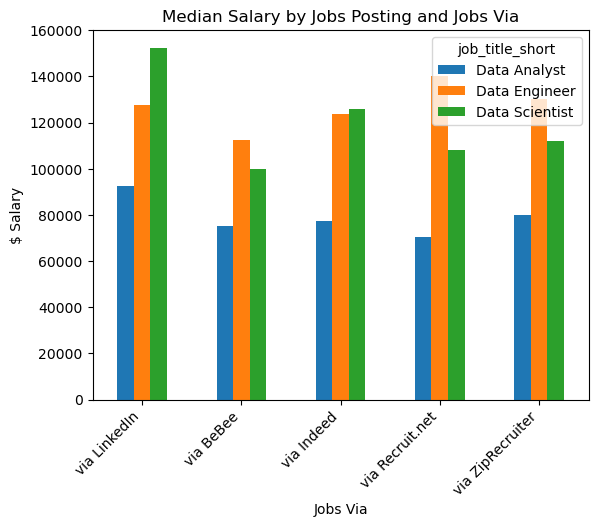

In [113]:
df_sal_via_title.loc[job_aquired_via].plot(kind="bar")
plt.title("Median Salary by Jobs Posting and Jobs Via")
plt.xlabel("Jobs Via")
plt.xticks(rotation=45, ha="right")
plt.ylabel("$ Salary")
plt.show()

In [ ]:
# 6:57:08 / 11:09:40